#  Convolutional Neural Network Tutorial

This notebook offers a first simple introduction to the use of Convolutional Neural Networks. All important steps necessary to load training data, create and train a model and evaluate it are performed and described.

A CNN will be trained as a binary classifier to distinguish Chihuahuas from muffins.  
<img src="Notebook_Images/full.jpg">

### Definition of a function

With Jupyter, function can be defined and reused elsewhere. In addition, two variables (image_height, image_width) are defined in this code block

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

image_height=171
image_width= 171
filename= 'test_data.npz'

def plot(images_to_plot, predictions= np.array([]), titles=[]):
    fig = plt.figure(figsize=(10, 10))
    for i in range(len(images_to_plot)):
        ax = fig.add_subplot(4, 4, 1 + i, xticks=[], yticks=[])
        im = images_to_plot[i]
        if titles:
            ax.set_title(titles[i])
        if predictions.size:
            ax.set_xlabel('dog: %6.2f \n muffin %6.2f'
                      % (predictions[i][0], predictions[i][1]), fontsize=12)
        plt.imshow(im)
    
    plt.tight_layout()
    plt.show()

## Load image data
First the data must be loaded for the training. The individual files must be sorted by class and placed in the corresponding folders, as shown below.  <br>
* \Data
   * \Chihuahuas 
      *  img1.jpg
      *  img2.jpg
      *  img3.jpg 
   * \Muffins
       * img1.jpg 
       * img2.jpg 
       * img3.jpg 

In [11]:
data_dir = 'C:\CodeProject\Python\BloodCells\data\dataset\JPEGImages'

def load_data(data_dir, img_Size_X, img_size_Y):
        directories = [d for d in os.listdir(data_dir)
                       if os.path.isdir(os.path.join(data_dir, d))]
        labels = []
        category = 0
        file_names = []
        
        print(directories)
        for d in directories:

            label_dir = os.path.join(data_dir, d)
            for path, subdirs, files in os.walk(label_dir):
                for name in files[:150]:
                    if name.endswith(".jpg") or name.endswith(".png") or name.endswith(".jpeg"):
                        os.path.join(path, name)
                        file_names.append(os.path.join(path, name))
                        labels.append(category)

            category += 1

        print(len(file_names))
        data = np.empty((len(file_names), img_Size_X, img_size_Y, 3), dtype=np.uint8)
        for i, fpath in enumerate(file_names):
            img = cv2.imread(fpath)
            img = cv2.resize(img, (img_Size_X, img_size_Y))
            data[i, ...] = img.transpose(0, 1, 2)
        return data, labels

img, lbl= load_data(data_dir, 100, 100)


['BloodImage_00000.jpg', 'BloodImage_00001.jpg', 'BloodImage_00002.jpg', 'BloodImage_00003.jpg', 'BloodImage_00004.jpg', 'BloodImage_00005.jpg', 'BloodImage_00006.jpg', 'BloodImage_00007.jpg', 'BloodImage_00008.jpg', 'BloodImage_00009.jpg', 'BloodImage_00010.jpg', 'BloodImage_00011.jpg', 'BloodImage_00012.jpg', 'BloodImage_00013.jpg', 'BloodImage_00014.jpg', 'BloodImage_00015.jpg', 'BloodImage_00016.jpg', 'BloodImage_00017.jpg', 'BloodImage_00018.jpg', 'BloodImage_00019.jpg', 'BloodImage_00020.jpg', 'BloodImage_00021.jpg', 'BloodImage_00022.jpg', 'BloodImage_00023.jpg', 'BloodImage_00024.jpg', 'BloodImage_00026.jpg', 'BloodImage_00028.jpg', 'BloodImage_00029.jpg', 'BloodImage_00030.jpg', 'BloodImage_00031.jpg', 'BloodImage_00032.jpg', 'BloodImage_00033.jpg', 'BloodImage_00034.jpg', 'BloodImage_00035.jpg', 'BloodImage_00036.jpg', 'BloodImage_00037.jpg', 'BloodImage_00038.jpg', 'BloodImage_00039.jpg', 'BloodImage_00040.jpg', 'BloodImage_00041.jpg', 'BloodImage_00042.jpg', 'BloodImage_000

### Save dataset as a numpy .npz
To avoid loading the images again and again, numpy provides a very efficient method to save large amounts of data as a .npz file. To do this, the images and labels must be passed to the method as numpy arrays. 

In [17]:
np.savez_compressed(filename,
                    images=images,
                    labels=labels)

### Load images from .npz file
numpy also provides a function to load data from an npz file. The images and labels are read as numpy arrays from the file. 

In [18]:
dataset= np.load(file=filename)
labels=dataset['labels']
images=dataset['images']
images= np.concatenate((images[labels ==0][:100], images[labels ==1][:100]) ,axis=0)
labels= np.concatenate((labels[labels ==0][:100], labels[labels ==1][:100]) ,axis=0)
print('load %d files' %len(labels))

load 16 files


### Show some testimages
Now the plot method, which we defined at the beginning, is used to display the images. In the first example eight images of each class are displayed.

16


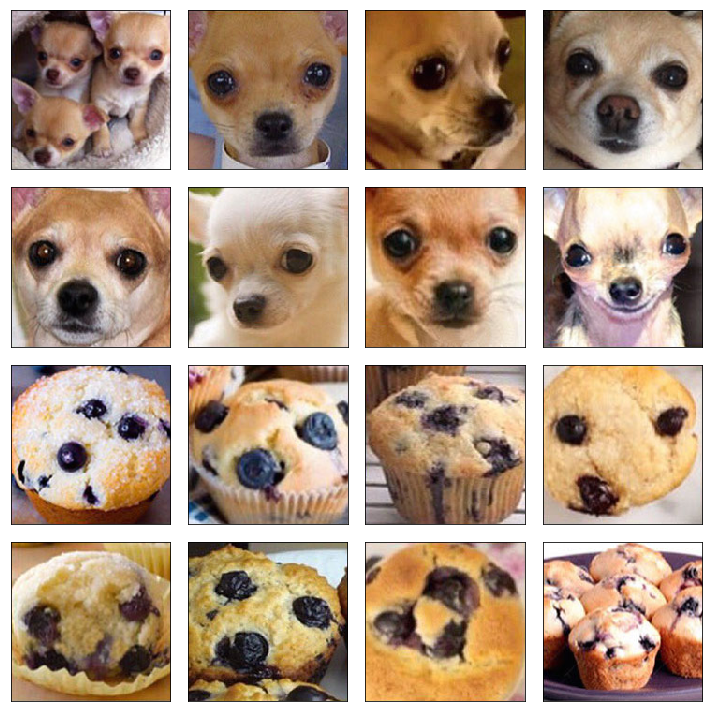

In [19]:
images_to_show= np.concatenate((images[labels ==0][:8], images[labels ==1][:8]) ,axis=0)
print(len(images_to_show))

plot(images_to_show)

## Preprocessing

### Image Augmentation
To increase the amount of test data, the images have to be processed. For this example, the images are randomly flipped vertically or horizontally. In addition, a copy of the original image is created as a gray value image.

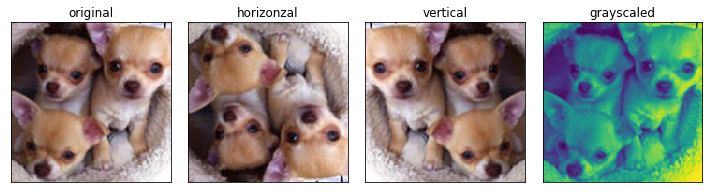

In [20]:
import cv2

img= images[0]

horizontal_flipt= cv2.flip(img, 0)
vertical_flipt= cv2.flip(img, 1)
gray_scaled_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

augmented_images= [img, horizontal_flipt, vertical_flipt, gray_scaled_img]
titels=['original', 'horizonzal', 'vertical', 'grayscaled']
plot(augmented_images, titles=titels)

def randomize_images(images,labels):

    for index in range(len(images)):
        img = images[index]
        flipt_img= cv2.flip(img, np.random.randint(0,1))
        flipt_img = np.expand_dims(flipt_img, axis=0)
        images=np.vstack((images, flipt_img))
        labels = np.append(labels, np.asarray(labels[index]))
    print(len(images))
    return images, labels

After preparing the data, the arrays are randomly mixed. The sklearn.shuffel method shuffles the images and labels equally. Set the Random_State for reproducibility  to a constant value.

In [21]:
from sklearn.utils import shuffle
images , labels = shuffle(images , labels, random_state=9)

After that the date are divided into training, validation and test samples. 
Training and validation samples are used to adjust weights during learning. 
The test samples have to be split off before the training phase and are used to evaluate the classifier after training. 

<img src="Notebook_Images/Test-train-Val.PNG" height="600" width="600" >
<cite data-cite="Raschka">(Sebastian Raschka und Vahid Mirjalili. Machine Learning mit Python
und Scikit-learn und TensorFlow: Das umfassende Praxis-Handbuch für
Data Science, Deep Learning und Predictive Analytics. 2., aktualisierte
und erweiterte Auflage. Frechen: mitp, 2018. isbn: 978-3-95845-733-1.)</cite>


In [22]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

length=len(labels)

X_train = images[:int(length*0.8)]
X_val   = images[int(length*0.8):int(length*0.9)]
X_test  = images[int(length*0.9):]
y_train = labels[:int(length*0.8)] 
y_val   = labels[int(length*0.8):int(length*0.9)]
y_test  = labels[int(length*0.9):]


y_train= np_utils.to_categorical(y_train, 2)
y_val = np_utils.to_categorical(y_val, 2)

print("Trainingsdaten:", X_train.shape)
print("Validierungsdaten:", X_val.shape)
print("Testdaten:", X_test.shape)

Trainingsdaten: (12, 171, 171, 3)
Validierungsdaten: (2, 171, 171, 3)
Testdaten: (2, 171, 171, 3)


### Standardization of feature values
To prevent outliers in the pixel values from having a large influence on the weight change, the feature values are standardized. 

\begin{equation*}
x^{(i)}_{std}=\frac{x^{(i)}-\mu_x}{\sigma_x}
\end{equation*}

<cite data-cite="Raschka">(Sebastian Raschka und Vahid Mirjalili. Machine Learning mit Python
und Scikit-learn und TensorFlow: Das umfassende Praxis-Handbuch für
Data Science, Deep Learning und Predictive Analytics. 2., aktualisierte
und erweiterte Auflage. Frechen: mitp, 2018. isbn: 978-3-95845-733-1.)</cite>

In [23]:
mean_values=np.mean(X_train, axis=0)
std_values=np.std(X_train)

x_train_centered= (X_train- mean_values)/std_values
x_val_centered= (X_val- mean_values)/std_values
x_test_centered= (X_test- mean_values)/std_values

# Convolutional Neural Network

This command creates a convolutional layer in the model. For this the number of filters (32) and the size of the filter kernels in pixel(5x5) as well as the activation function activation('relu') must be specified. Optionally the initialization and the padding mode can be specified.   
    * model.add(Convolution2D(32, (5, 5), activation='relu',kernel_initializer='glorot_uniform', padding='same'))
    
After a convolution block a pooling operation follows. The pooling layer in this example has the size 2x2 pixels.
    * model.add(MaxPooling2D(pool_size=(2, 2)))

Dense layers are fully connected layers. Here in the example with 512 neurons on this layer. The number of neurons in the last dense layer determines the number of classes to be distinguished.
    * model.add(Dense(512,kernel_initializer='glorot_uniform', activation='relu'))
    
Finally, the model has to be compiled. In this case, Categorical-Crossentropy is used as the loss function, Binaray-Crossentropy can be used for a two-class problem. As optimization method stochhastical gradient descent (SGD) is specified, the parameters such as learning rate (lr) can be adjusted during learning.  
    * model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy',  metrics=['accuracy'])
    
With the model.summary command the structure of the model can be printed in the shell.

In [24]:
import keras
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D,  BatchNormalization, Dropout, Flatten, Dense
from keras.optimizers import SGD

model = Sequential()

model.add(Convolution2D(32, (5, 5), activation='relu',kernel_initializer='glorot_uniform', padding='same', 
                        input_shape=(image_height, image_width, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3),kernel_initializer='glorot_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3),kernel_initializer='glorot_uniform', activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512,kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128,kernel_initializer='glorot_uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='categorical_crossentropy',  metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 171, 171, 32)      2432      
_________________________________________________________________
batch_normalization_4 (Batch (None, 171, 171, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 85, 85, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 85, 85, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 42, 42, 32)        9248      
__________

### Training

The Fit command trains the model. For this, training and validation data as well as the number of training epochs must be passed on. The verbose parameter is be used to determine how often a shell output with current training values should be printed during training. Callbacks accepts a list of predefined callback methods, in our case a callback has been defined which stores the current weightings during the training as soon as the accuracy has increased in an epoch and the loss has fallen. Callbacks can also be defined to store certain values for later visualization or to adapt the learning rate.


In [34]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpointer = ModelCheckpoint(filepath='model.hdf5', verbose=1, save_best_only=True)
earlyStopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

model.fit(x_train_centered, y_train,
          batch_size=100,
          epochs=10,
          validation_data=(x_val_centered,  y_val),
          verbose=1,
          callbacks=[checkpointer, earlyStopper, reduce_lr])

Train on 12 samples, validate on 2 samples
Epoch 1/10
12/12 [==============================] - 5s 424ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 1.3252 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 1.32518, saving model to model.hdf5
Epoch 2/10
12/12 [==============================] - 5s 408ms/step - loss: 0.0026 - acc: 1.0000 - val_loss: 1.3050 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 1.32518 to 1.30498, saving model to model.hdf5
Epoch 3/10
12/12 [==============================] - 5s 416ms/step - loss: 0.0018 - acc: 1.0000 - val_loss: 1.2840 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 1.30498 to 1.28403, saving model to model.hdf5
Epoch 4/10
12/12 [==============================] - 5s 418ms/step - loss: 0.0324 - acc: 1.0000 - val_loss: 1.1625 - val_acc: 0.5000

Epoch 00004: val_loss improved from 1.28403 to 1.16254, saving model to model.hdf5
Epoch 5/10
12/12 [==============================] - 5s 417ms/step - loss: 8.0304e-04 

### Load a trained model
For later reuse, models can be saved during and after the learning process. Keras therefore offers several formats like JSON or hdf5. These models can then be reloaded to classify new data.

In [27]:
from keras.models import load_model
model=load_model("model.hdf5")

OSError: Unable to open file (unable to open file: name = 'model.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Evaluation

The Predict method is used to predict the class of images with the model. To do this, individual images or an array of images can be passed to the method.  

The evaluate-function is a fast function to evaluate a model. This method calculates accuracy and loss for an array of data.  

At the beginning, the images were divided into training, validation and test samples. The test sample was not used during training and is therefore still unknown to the model. Thus it can be used to evaluate the model.

The class probabilities for the actual productive data are then computed. To do this, they are first loaded and standardized.

In [ ]:
img_to_plot= X_test[:16]
predictions= model.predict(x_test_centered)[:16]
plot(img_to_plot, predictions= predictions)

true_labels=np_utils.to_categorical(y_test, 2)
metric= model.evaluate(x_test_centered, true_labels)

print('loss: %10.2f  \naccuracy: %6.2f' % (metric[0], metric[1]))

In [ ]:
dataset= np.load('test_data.npz')
labels=dataset['labels']
images=dataset['images']

mean_values=np.mean(X_train, axis=0)
std_values=np.std(X_train)

x_test_centered= (images- mean_values)/std_values
plot(images, predictions= model.predict(x_test_centered))

true_labels=np_utils.to_categorical(labels, 2)
metric= model.evaluate(x_test_centered, true_labels)

print('loss: %10.2f  \naccuracy: %6.2f' % (metric[0], metric[1]))